In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing important libraries for EDA

# libraries for data manipulation
import pandas as pd
import numpy as np
# libralies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data from drive
application_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lord AI Project - Evoastra Ventures (Opc)/Credit EDA /Credit EDA Case Study/application_data.csv')

In [4]:
# Loading another data
previous_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lord AI Project - Evoastra Ventures (Opc)/Credit EDA /Credit EDA Case Study/previous_application.csv')

In [5]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## **Dealing with application_data**

In [7]:
print(application_data.shape)
application_data.columns

(307511, 122)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
print(previous_data.shape)
previous_data.columns

(1670214, 37)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [9]:
# # merge both data w.r.t columns using there ids
# merge_data=pd.merge(application_data,previous_data, how='left', on ='SK_ID_CURR')

In [10]:
# First look of dataset
pd.set_option('display.max_columns', None)
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [11]:
# Checking shape of data
application_data.shape

(307511, 122)

In [12]:
# checking info of the dataset
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
# Ckecking missing values in dataset
total = application_data.isnull().sum().sort_values(ascending=False)
percent = (application_data.isnull().sum()/application_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(60)

Total   Percent
COMMONAREA_MEDI               214865  0.698723
COMMONAREA_AVG                214865  0.698723
COMMONAREA_MODE               214865  0.698723
NONLIVINGAPARTMENTS_MODE      213514  0.694330
NONLIVINGAPARTMENTS_AVG       213514  0.694330
NONLIVINGAPARTMENTS_MEDI      213514  0.694330
FONDKAPREMONT_MODE            210295  0.683862
LIVINGAPARTMENTS_MODE         210199  0.683550
LIVINGAPARTMENTS_AVG          210199  0.683550
LIVINGAPARTMENTS_MEDI         210199  0.683550
FLOORSMIN_AVG                 208642  0.678486
FLOORSMIN_MODE                208642  0.678486
FLOORSMIN_MEDI                208642  0.678486
YEARS_BUILD_MEDI              204488  0.664978
YEARS_BUILD_MODE              204488  0.664978
YEARS_BUILD_AVG               204488  0.664978
OWN_CAR_AGE                   202929  0.659908
LANDAREA_MEDI                 182590  0.593767
LANDAREA_MODE                 182590  0.593767
LANDAREA_AVG                  182590  0.593767
BASEMENTAREA_MEDI             179943  0.585160
BASEMENTAREA_AVG              179943  0.585160
BASEMENTAREA_MODE             179943  0.585160
EXT_SOURCE_1                  173378  0.563811
NONLIVINGAREA_MODE            169682  0.551792
NONLIVINGAREA_AVG             169682  0.551792
NONLIVINGAREA_MEDI            169682  0.551792
ELEVATORS_MEDI                163891  0.532960
ELEVATORS_AVG                 163891  0.532960
ELEVATORS_MODE                163891  0.532960
WALLSMATERIAL_MODE            156341  0.508408
APARTMENTS_MEDI               156061  0.507497
APARTMENTS_AVG                156061  0.507497
APARTMENTS_MODE               156061  0.507497
ENTRANCES_MEDI                154828  0.503488
ENTRANCES_AVG                 154828  0.503488
ENTRANCES_MODE                154828  0.503488
LIVINGAREA_AVG                154350  0.501933
LIVINGAREA_MODE               154350  0.501933
LIVINGAREA_MEDI               154350  0.501933
HOUSETYPE_MODE                154297  0.501761
FLOORSMAX_MODE                153020  0.497608
FLOORSMAX_MEDI                153020  0.497608
FLOORSMAX_AVG                 153020  0.497608
YEARS_BEGINEXPLUATATION_MODE  150007  0.487810
YEARS_BEGINEXPLUATATION_MEDI  150007  0.487810
YEARS_BEGINEXPLUATATION_AVG   150007  0.487810
TOTALAREA_MODE                148431  0.482685
EMERGENCYSTATE_MODE           145755  0.473983
OCCUPATION_TYPE                96391  0.313455
EXT_SOURCE_3                   60965  0.198253
AMT_REQ_CREDIT_BUREAU_HOUR     41519  0.135016
AMT_REQ_CREDIT_BUREAU_DAY      41519  0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     41519  0.135016
AMT_REQ_CREDIT_BUREAU_MON      41519  0.135016
AMT_REQ_CREDIT_BUREAU_QRT      41519  0.135016
AMT_REQ_CREDIT_BUREAU_YEAR     41519  0.135016
NAME_TYPE_SUITE                 1292  0.004201
OBS_30_CNT_SOCIAL_CIRCLE        1021  0.003320
DEF_30_CNT_SOCIAL_CIRCLE        1021  0.003320

In [14]:
# Removing all columns having more than 30% null values
emptycol=application_data.isnull().sum()/len(application_data)*100
emptycol = list(emptycol[emptycol.values>=30.0].index)
application_data.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

50


In [15]:
application_data.shape

(307511, 72)

In [16]:
#checking for coloums having null values
emptycol=application_data.isnull().sum()/len(application_data)*100
emptycol=emptycol[emptycol.values>0.0]
print(len(emptycol))
emptycol

17


AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [17]:
# Checking Duplicates in the dataset
duplicate_value_count=application_data.duplicated().sum()
duplicate_value_count

0

## **Univariate Analysis with treatment of nulls and Outlier in it.**

###1.AMT_ANNUITY column

In [18]:
# Ckecking Skewness of the data
ax=sns.histplot(x=application_data['AMT_ANNUITY'],data=application_data,kde=True,bins=10,color='blue')

As per the analysis we can say that it is positive skewed data, we cannot justify outlier in it because there may be peoples having more than one lakh amount annuity and we cannot drop it because it contains sensitive data in it. so we are replacing nulls with median value.

In [19]:
# Filling missing values in the dataset
fillMissingVal=application_data['AMT_ANNUITY'].median()
application_data['AMT_ANNUITY'].fillna(value = fillMissingVal, inplace =True)
application_data['AMT_ANNUITY'].isnull().sum()

0

###2. AMT_GOODS_PRICE Column

In [20]:
application_data['AMT_GOODS_PRICE'].isnull().sum()

278

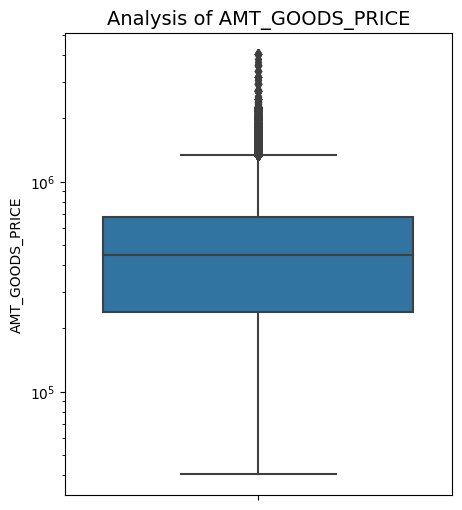

In [21]:
#box plotting the values of AMT_GOODS_PRICE

plt.figure(figsize=(5,6))
sns.boxplot(y=application_data['AMT_GOODS_PRICE'])
plt.yscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_GOODS_PRICE",fontsize=14)
plt.show()

In [22]:
# describing the application_data of goods price
print(application_data['AMT_GOODS_PRICE'].describe())
print(application_data['AMT_GOODS_PRICE'].median())
print(application_data['AMT_GOODS_PRICE'].mean())
print(application_data['AMT_GOODS_PRICE'].max())
print(application_data['AMT_GOODS_PRICE'].min())

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
538396.2074288895
4050000.0
40500.0


From the analysis we can say that goods amount can be more than 10 lakhs.So we are replacing null with median value.

In [23]:
# Filling missing values in the dataset
fillMissingVal=application_data['AMT_GOODS_PRICE'].median()
application_data['AMT_GOODS_PRICE'].fillna(value = fillMissingVal, inplace =True)
application_data['AMT_GOODS_PRICE'].isnull().sum()

0

###3. Analysis of NAME_TYPE_SUITE column.

In [24]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

[Text(0, 0, 'Unaccompanied'),
 Text(1, 0, 'Family'),
 Text(2, 0, 'Spouse, partner'),
 Text(3, 0, 'Children'),
 Text(4, 0, 'Other_A'),
 Text(5, 0, 'Other_B'),
 Text(6, 0, 'Group of people')]

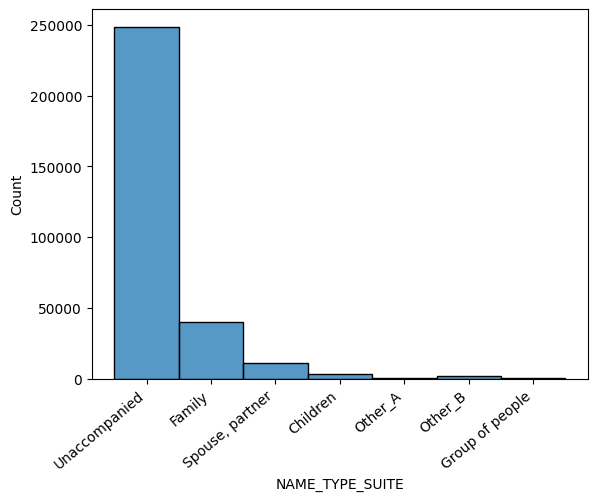

In [25]:
ax=sns.histplot(data=application_data['NAME_TYPE_SUITE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

From the above graph we can say that credit card is mostly required for parsonal use and while applying or enquiry customer visit acn be without family members. So, replacing nulls values to mode of this variable with unaccompanied.

In [26]:
#Handling missing value in categorical data
fillMissingVal=application_data['NAME_TYPE_SUITE'].mode()
application_data['NAME_TYPE_SUITE'].replace([np.nan], application_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)
application_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [27]:
emptycol

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

### Analysis of CNT_FAM_MEMBERS column

In [28]:
# Checking null value in this column
application_data.CNT_FAM_MEMBERS.isnull().sum()

2

In [29]:
type(application_data['CNT_FAM_MEMBERS'].mode())

pandas.core.series.Series

In [30]:
# replacing with mode
application_data['CNT_FAM_MEMBERS'].replace([np.nan], application_data['CNT_FAM_MEMBERS'].mode()[0], inplace=True)
application_data['CNT_FAM_MEMBERS'].isnull().sum()

0

### Dealing with EXT_SOURCE_2 and EXT_SOURCE_2 column.

<Axes: xlabel='EXT_SOURCE_2', ylabel='Density'>

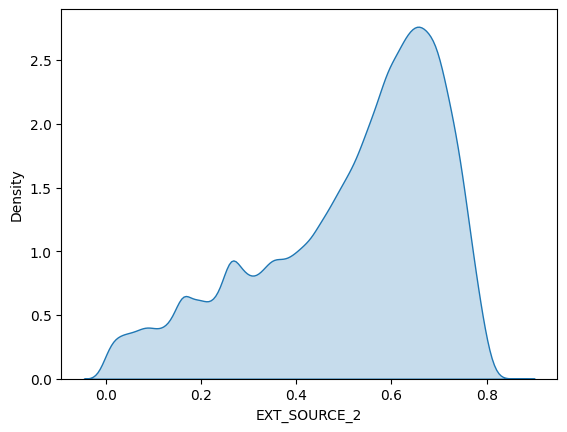

In [31]:
sns.kdeplot(data=application_data['EXT_SOURCE_2'], shade=True)

In [32]:
sns.kdeplot(data=application_data['EXT_SOURCE_3'], shade=True)

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

It is a negative skewed data and replace using median value.

In [33]:
application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].median(), inplace=True)
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].median(), inplace=True)
print('Null Values in EXT_SOURCE_2:',application_data['EXT_SOURCE_2'].isnull().sum())
print('Null Values in EXT_SOURCE_3:',application_data['EXT_SOURCE_3'].isnull().sum())

Null Values in EXT_SOURCE_2: 0
Null Values in EXT_SOURCE_3: 0


#### Analysis of AMT_REQ_CREDIT_BUREAU_DAY

In [34]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

### Analysis of Social Circle column

In [35]:
# Outlier treatment
outliers=application_data[application_data['OBS_30_CNT_SOCIAL_CIRCLE']>30]
outliers

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
77497       189856       0         Cash loans           M            Y   
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
77497                Y             1          157500.0    296280.0   
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
77497       23539.5         225000.0          Family          Working   
148403       9000.0         180000.0          Family    State servant   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
77497   Secondary / secondary special               Married   
148403               Higher education  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
77497   House / apartment                    0.010147      -14767   
148403  House / apartment                    0.020246      -10111   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
77497           -2767           -13306.0            -4720           1   
148403          -1917            -2306.0            -2306           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
77497                1                0                 1           0   
148403               1                0                 1           0   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
77497            1              3.0                     2   
148403           0              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
77497                             2                     MONDAY   
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
77497                        17                           0   
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
77497                            0                            0   
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
77497                        0                       0   
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
77497                         0  Industry: type 4      0.398805      0.750375   
148403                        1            Police      0.304506      0.357293   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
77497                       47.0                       0.0   
148403                     348.0                      34.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
77497                       47.0                       0.0   
148403                     344.0                      24.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
77497                      0.0                0                1   
148403                  -667.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
77497                 0                0                0                0   
148403                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
77497                 0                0                 0                 0   
148403                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
77497                  0                 0                 0   
148403                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
77497     

In [36]:
# Dropping Outliers
application_data.drop([77497,148403], axis=0, inplace=True)

In [37]:
# Plotting subplots for the values understanding
fig, ax= plt.subplots(4,1, figsize=(15,15))
sns.countplot(data=application_data, x=application_data['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[0])
sns.countplot(data=application_data, x=application_data['DEF_30_CNT_SOCIAL_CIRCLE'],ax=ax[1])
sns.countplot(data=application_data, x=application_data['OBS_60_CNT_SOCIAL_CIRCLE'],  ax=ax[2])
sns.countplot(data=application_data, x=application_data['DEF_60_CNT_SOCIAL_CIRCLE'],  ax=ax[3])
plt.show()

In [38]:
# Replacing nulls with mode due to categorical column
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [39]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [40]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [41]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

### Analysis of AMT_REQ_CREDIT_BUREAU columns.

In [42]:
# Checking Null values
bool_series = pd.isnull(application_data["AMT_REQ_CREDIT_BUREAU_HOUR"])
application_data[bool_series].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3       100006       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
14      100018       0         Cash loans           F            N   
17      100021       0    Revolving loans           F            N   
20      100024       0    Revolving loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
3                Y             0          135000.0    312682.5      29686.5   
9                Y             0          135000.0    405000.0      20250.0   
14               Y             0          189000.0    773680.5      32778.0   
17               Y             1           81000.0    270000.0      13500.0   
20               Y             0          135000.0    427500.0      21375.0   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
3          297000.0   Unaccompanied          Working   
9          405000.0   Unaccompanied          Working   
14         679500.0   Unaccompanied          Working   
17         270000.0   Unaccompanied          Working   
20         427500.0   Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
3   Secondary / secondary special        Civil marriage  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
14  Secondary / secondary special               Married  House / apartment   
17  Secondary / secondary special               Married  House / apartment   
20  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
3                     0.008019      -19005          -3039            -9833.0   
9                     0.019689      -14469          -2019           -14437.0   
14                    0.010006      -14583           -203             -615.0   
17                    0.010966       -9776           -191            -4143.0   
20                    0.015221      -18252          -4286             -298.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
3             -2437           1               1                0   
9             -3992           1               1                0   
14            -2056           1               1                0   
17            -2427           1               1                0   
20            -1800           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
3                  1           0           0              2.0   
9                  1           0           0              1.0   
14                 1           0           0              2.0   
17                 1           0           0              3.0   
20                 1           0           0              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
3                      2                            2   
9                      2                            2   
14                     2                            1   
17                     2                            2   
20                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
3                   WEDNESDAY                       17   
9                    THURSDAY                        8   
14                     MONDAY                        9   
17                     MONDAY                       10   
20                     FRIDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
3                            0                           0   
9                            0                           0   
14                           0                           0   
17                           0                           0   
20                 

In [43]:
emptycol

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [44]:
# Plotting subplots for the values understanding
fig, ax= plt.subplots(6,1, figsize=(25,30))
sns.countplot(data=application_data, x=application_data['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0])
sns.countplot(data=application_data, x=application_data['AMT_REQ_CREDIT_BUREAU_DAY'],ax=ax[1])
sns.countplot(data=application_data, x=application_data['AMT_REQ_CREDIT_BUREAU_WEEK'],  ax=ax[2])
sns.countplot(data=application_data, x=application_data['AMT_REQ_CREDIT_BUREAU_MON'],  ax=ax[3])
sns.countplot(data=application_data, x=application_data['AMT_REQ_CREDIT_BUREAU_QRT'],  ax=ax[4])
sns.countplot(data=application_data, x=application_data['AMT_REQ_CREDIT_BUREAU_YEAR'],  ax=ax[5])
plt.show()

In [45]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215415
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [46]:
# Outlier Removing from the dataset
outliers=application_data[application_data['AMT_REQ_CREDIT_BUREAU_QRT']>10]
outliers

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
239474      377322       0         Cash loans           F            N   
253541      393383       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239474               Y             1          360000.0   1035000.0   
253541               Y             1          202500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
239474      30393.0        1035000.0   Unaccompanied          Working   
253541      34596.0         675000.0          Family          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
239474               Higher education               Married   
253541  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
239474  House / apartment                    0.026392      -13590   
253541  House / apartment                    0.026392      -19149   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
239474          -3336            -3629.0            -3267           1   
253541          -1397           -11759.0            -2036           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
239474               1                0                 1           1   
253541               1                0                 1           0   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
239474           0              3.0                     2   
253541           0              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
239474                            2                     MONDAY   
253541                            2                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
239474                       19                           0   
253541                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
239474                           0                            0   
253541                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
239474                       0                       0   
253541                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
239474                        0  Business Entity Type 2      0.663803   
253541                        0            Construction      0.007160   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
239474      0.535276                       3.0                       0.0   
253541      0.535276                       0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
239474                       3.0                       0.0   
253541                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
239474                  -695.0                0                1   
253541                   -65.0                0                1   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
239474                0                0                0                0   
253541                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
239474                0                0                 0                 0   
253541                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
239474                 0                 0                 0   
253541                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMEN

In [47]:
# Dropping Outlier
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].drop([239474,253541], axis=0, inplace=True)

As per analysis we can say that, Number of enquiries to Credit Bureau about the client before application is mostly at the time of applying. So, we are replacing nulls with there mode from the dataset.

In [48]:
emptycol

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [49]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [50]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [51]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [52]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [53]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [54]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

### Analysis of code gender

In [55]:
#checking count of each gender M/F
application_data['CODE_GENDER'].value_counts()

F      202448
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

As We can see that Female(F) is having the majority and only 4 rows are having XNA values. So, there wont be any major impact in the dataset if we can update those columns with Gender 'F'.

In [56]:
#replace XNA with F and #checking count of each gender M/F
application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data['CODE_GENDER'].value_counts()

F    202452
M    105057
Name: CODE_GENDER, dtype: int64

In [57]:
#plot the bar graph of CODE_GENDER
application_data['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='Analysis of Code Gender')
plt.show()

In [58]:
# Checking Nulls from the dataset
application_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 72, dtype: int64

In [59]:
# Casting all variable into numeric in the dataset
numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_data[numeric_cols]=application_data[numeric_cols].apply(pd.to_numeric)
application_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

####Checking class imbalance in TARGET Column.

In [60]:
plt.figure(figsize=(12,7))
application_data.TARGET.value_counts().plot.barh(color='blue')

<Axes: >

In [61]:
# Percentage of class imbalance
target_0=application_data.loc[application_data['TARGET']==0]
target_1=application_data.loc[application_data['TARGET']==1]

round(len(target_0)/len(target_1),2)

11.39

## **Dealing with previous_data**

In [62]:
print(previous_data.shape)
previous_data.head()

(1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [63]:
# Cleaning the missing data
# listing the null values columns having more than 50%

emptycol1=previous_data.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [64]:
previous_data.shape

(1670214, 37)

In [65]:
#Removing those 15 columns
emptycol1 = list(emptycol1[emptycol1.values>=0.5].index)
previous_data.drop(labels=emptycol1,axis=1,inplace=True)
previous_data.shape

(1670214, 22)

In [66]:
#Removing the column values of 'XNA' and 'XAP'
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
previous_data.shape

(69635, 22)

In [67]:
previous_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

From the above analysis we can say that in previous data no null values are there.

In [68]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Distribution Of Contract Status With Purposes')
plt.xscale('log')

ax = sns.countplot(data = previous_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=previous_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='Set2')
ax.xaxis.tick_top()

We can conclude the below points from the graph:

1.Most rejection of loans came from purpose 'Repairs'.  
      
2.We have almost equal number of approves and rejection for Medicine,Every day expenses and education purposes.

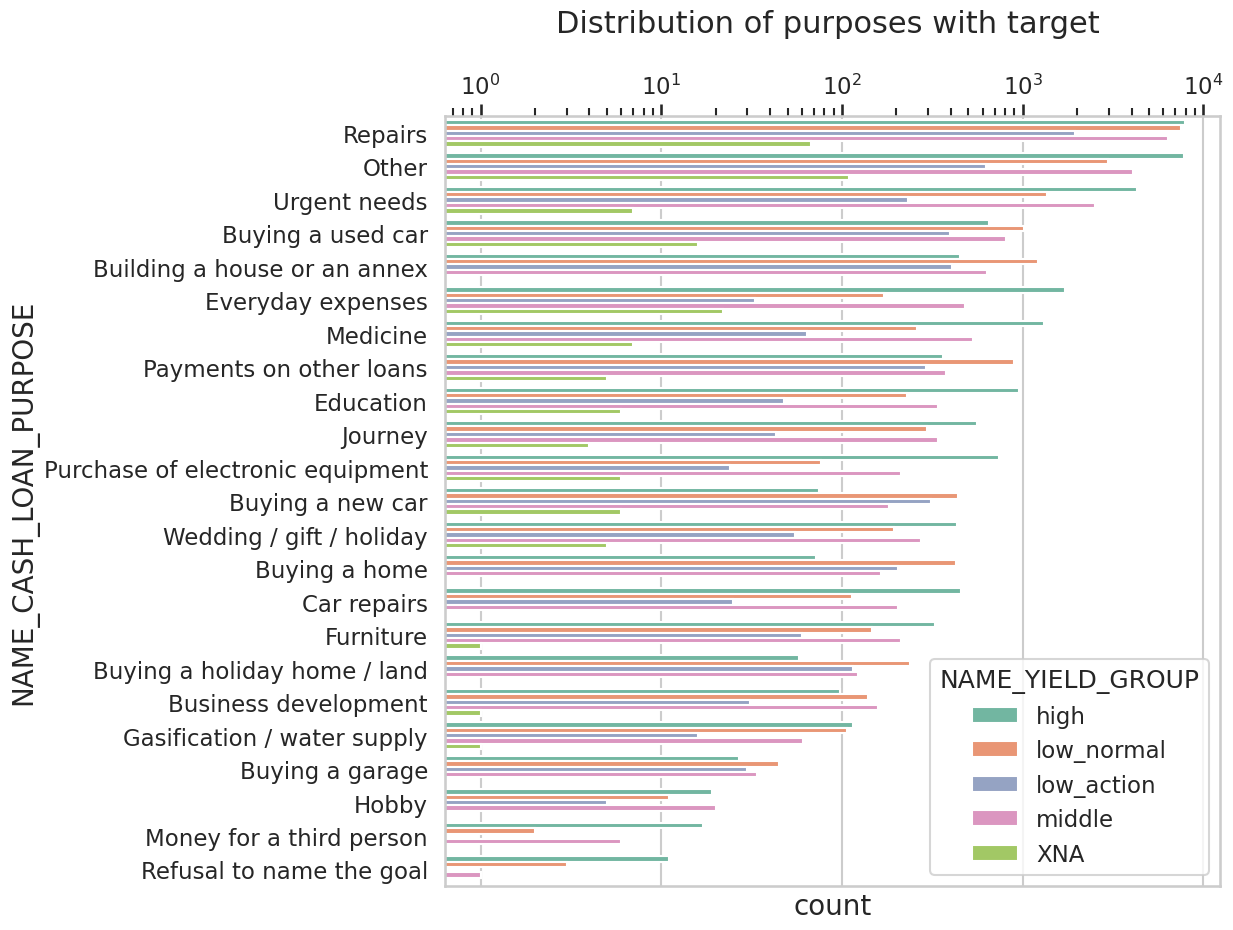

In [69]:
#Distribution of purposes with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = previous_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=previous_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_YIELD_GROUP',palette='Set2')
ax.xaxis.tick_top()

we can conclude from above plot that Loan purposes with 'Repairs' and'others' are facing more difficulites in payment on time.

##**Merging Both the Data**

In [70]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   69635 non-null  int64  
 1   SK_ID_CURR                   69635 non-null  int64  
 2   NAME_CONTRACT_TYPE           69635 non-null  object 
 3   AMT_APPLICATION              69635 non-null  float64
 4   AMT_CREDIT                   69635 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   69635 non-null  object 
 6   HOUR_APPR_PROCESS_START      69635 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  69635 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       69635 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       69635 non-null  object 
 10  NAME_CONTRACT_STATUS         69635 non-null  object 
 11  DAYS_DECISION                69635 non-null  int64  
 12  NAME_PAYMENT_TYPE            69635 non-null  object 
 13  CODE_REJECT_RE

joining the data using left joint because we have to take our application data as a prior basis with respect previous data.

In [71]:
#Merging the Application dataset with previous appliaction dataset
Merged_data=pd.merge(left=application_data,right=previous_data,how='left',on='SK_ID_CURR',suffixes='_x')

In [72]:
total = Merged_data.isnull().sum().sort_values(ascending=False)
percent = (Merged_data.isnull().sum()/Merged_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(60)

Total   Percent
NAME_YIELD_GROUP             271592  0.820507
DAYS_DECISION                271592  0.820507
SK_ID_PREV                   271592  0.820507
NAME_CONTRACT_TYPEx          271592  0.820507
AMT_APPLICATION              271592  0.820507
AMT_CREDITx                  271592  0.820507
WEEKDAY_APPR_PROCESS_STARTx  271592  0.820507
FLAG_LAST_APPL_PER_CONTRACT  271592  0.820507
NFLAG_LAST_APPL_IN_DAY       271592  0.820507
NAME_CASH_LOAN_PURPOSE       271592  0.820507
NAME_CONTRACT_STATUS         271592  0.820507
HOUR_APPR_PROCESS_STARTx     271592  0.820507
NAME_PAYMENT_TYPE            271592  0.820507
NAME_SELLER_INDUSTRY         271592  0.820507
NAME_CLIENT_TYPE             271592  0.820507
NAME_GOODS_CATEGORY          271592  0.820507
CODE_REJECT_REASON           271592  0.820507
NAME_PORTFOLIO               271592  0.820507
NAME_PRODUCT_TYPE            271592  0.820507
CHANNEL_TYPE                 271592  0.820507
SELLERPLACE_AREA             271592  0.820507
DAYS_LAST_PHONE_CHANGE            1  0.000003
FLAG_DOCUMENT_15                  0  0.000000
FLAG_DOCUMENT_5                   0  0.000000
FLAG_DOCUMENT_6                   0  0.000000
FLAG_DOCUMENT_7                   0  0.000000
FLAG_DOCUMENT_8                   0  0.000000
FLAG_DOCUMENT_9                   0  0.000000
FLAG_DOCUMENT_10                  0  0.000000
FLAG_DOCUMENT_11                  0  0.000000
FLAG_DOCUMENT_12                  0  0.000000
FLAG_DOCUMENT_13                  0  0.000000
FLAG_DOCUMENT_14                  0  0.000000
AMT_REQ_CREDIT_BUREAU_QRT         0  0.000000
FLAG_DOCUMENT_16                  0  0.000000
FLAG_DOCUMENT_17                  0  0.000000
FLAG_DOCUMENT_18                  0  0.000000
FLAG_DOCUMENT_19                  0  0.000000
FLAG_DOCUMENT_20                  0  0.000000
FLAG_DOCUMENT_21                  0  0.000000
AMT_REQ_CREDIT_BUREAU_HOUR        0  0.000000
AMT_REQ_CREDIT_BUREAU_DAY         0  0.000000
AMT_REQ_CREDIT_BUREAU_WEEK        0  0.000000
AMT_REQ_CREDIT_BUREAU_MON         0  0.000000
FLAG_DOCUMENT_3                   0  0.000000
AMT_REQ_CREDIT_BUREAU_YEAR        0  0.000000
FLAG_DOCUMENT_4                   0  0.000000
SK_ID_CURR                        0  0.000000
TARGET                            0  0.000000
FLAG_EMP_PHONE                    0  0.000000
DAYS_ID_PUBLISH                   0  0.000000
DAYS_REGISTRATION                 0  0.000000
DAYS_EMPLOYED                     0  0.000000
DAYS_BIRTH                        0  0.000000
REGION_POPULATION_RELATIVE        0  0.000000
NAME_HOUSING_TYPE                 0  0.000000
NAME_FAMILY_STATUS                0  0.000000
NAME_EDUCATION_TYPE               0  0.000000
NAME_INCOME_TYPE                  0  0.000000
NAME_TYPE_SUITE                   0  0.000000

In [73]:
# Removing all columns having more than 40% null values
emptycol1=Merged_data.isnull().sum()/len(Merged_data)*100
emptycol1 = list(emptycol1[emptycol1.values>=40.0].index)
Merged_data.drop(labels=emptycol1,axis=1,inplace=True)
print(len(emptycol1))

21


In [74]:
Merged_data.shape

(331005, 72)

In [75]:
# Renaming the column names after merging
Merged_data = Merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [76]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331005 entries, 0 to 331004
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   331005 non-null  int64  
 1   TARGET                       331005 non-null  int64  
 2   NAME_CONTRACT_TYPE           331005 non-null  object 
 3   CODE_GENDER                  331005 non-null  object 
 4   FLAG_OWN_CAR                 331005 non-null  object 
 5   FLAG_OWN_REALTY              331005 non-null  object 
 6   CNT_CHILDREN                 331005 non-null  int64  
 7   AMT_INCOME_TOTAL             331005 non-null  float64
 8   AMT_CREDIT                   331005 non-null  float64
 9   AMT_ANNUITY                  331005 non-null  float64
 10  AMT_GOODS_PRICE              331005 non-null  float64
 11  NAME_TYPE_SUITE              331005 non-null  object 
 12  NAME_INCOME_TYPE             331005 non-null  object 
 13 

In [77]:
# Removing unwanted columns for analysis
Merged_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_MOBIL','FLAG_EMP_PHONE',
                  'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
                  'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                  'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',],axis=1,inplace=True)

In [78]:
#Converting the data types of some of the columns that shouldn't be float data-type.

Merged_data['DAYS_REGISTRATION']=Merged_data['DAYS_REGISTRATION'].astype(int, errors='ignore')
Merged_data['CNT_FAM_MEMBERS']=Merged_data['CNT_FAM_MEMBERS'].astype(int, errors='ignore')
Merged_data['OBS_30_CNT_SOCIAL_CIRCLE']=Merged_data['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
Merged_data['DEF_30_CNT_SOCIAL_CIRCLE']=Merged_data['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
Merged_data['OBS_60_CNT_SOCIAL_CIRCLE']=Merged_data['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
Merged_data['DEF_60_CNT_SOCIAL_CIRCLE']=Merged_data['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
Merged_data['AMT_REQ_CREDIT_BUREAU_HOUR']=Merged_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')
Merged_data['AMT_REQ_CREDIT_BUREAU_DAY']=Merged_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')
Merged_data['AMT_REQ_CREDIT_BUREAU_WEEK']=Merged_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')
Merged_data['AMT_REQ_CREDIT_BUREAU_MON']=Merged_data['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')
Merged_data['AMT_REQ_CREDIT_BUREAU_QRT']=Merged_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')
Merged_data['AMT_REQ_CREDIT_BUREAU_YEAR']=Merged_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

In [79]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331005 entries, 0 to 331004
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      331005 non-null  int64  
 1   NAME_CONTRACT_TYPE          331005 non-null  object 
 2   CODE_GENDER                 331005 non-null  object 
 3   FLAG_OWN_CAR                331005 non-null  object 
 4   FLAG_OWN_REALTY             331005 non-null  object 
 5   CNT_CHILDREN                331005 non-null  int64  
 6   AMT_INCOME_TOTAL            331005 non-null  float64
 7   AMT_CREDIT                  331005 non-null  float64
 8   AMT_ANNUITY                 331005 non-null  float64
 9   AMT_GOODS_PRICE             331005 non-null  float64
 10  NAME_TYPE_SUITE             331005 non-null  object 
 11  NAME_INCOME_TYPE            331005 non-null  object 
 12  NAME_EDUCATION_TYPE         331005 non-null  object 
 13  NAME_FAMILY_ST

In [80]:
Merged_data.shape

(331005, 37)

In [81]:
Merged_data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637              -3648            -2120   
1      -16765          -1188              -1186             -291   
2      -19046           -225              -4260            -2531   
3      -19005          -3039              -9833            -2437   
4      -19932          -3038              -4311            -3458   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  CNT_FAM_MEMBERS  \
0                0                 1                1   
1                0                 1                2   
2                1                 1                1   
3                0                 1                2   
4                0                 1                1   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                       10  Business Entity Type 3      0.262949   
1                       11                  School      0.622246   
2                        9              Government      0.555912   
3                       17  Business Entity Type 3      0.650442   
4                       11                Religion      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                         2                         2   
1      0.535276                         1                         0   
2      0.729567                         0                         0   
3      0.535276                         2                         0   
4      0.535276                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0  

###**Bivariate and Multivariate Analysis Of Merged Column.**

In [82]:
Merged_data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637              -3648            -2120   
1      -16765          -1188              -1186             -291   
2      -19046           -225              -4260            -2531   
3      -19005          -3039              -9833            -2437   
4      -19932          -3038              -4311            -3458   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  CNT_FAM_MEMBERS  \
0                0                 1                1   
1                0                 1                2   
2                1                 1                1   
3                0                 1                2   
4                0                 1                1   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                       10  Business Entity Type 3      0.262949   
1                       11                  School      0.622246   
2                        9              Government      0.555912   
3                       17  Business Entity Type 3      0.650442   
4                       11                Religion      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                         2                         2   
1      0.535276                         1                         0   
2      0.729567                         0                         0   
3      0.535276                         2                         0   
4      0.535276                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         0                         0   
3                         2                         0   
4                         0                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0  

In [83]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
max_review=sns.barplot(x=Merged_data.NAME_INCOME_TYPE,y=Merged_data.CNT_FAM_MEMBERS)
top_visual=sns.barplot(x=Merged_data.NAME_INCOME_TYPE,y=Merged_data.CNT_FAM_MEMBERS)
max_review.set_xticklabels(top_visual.get_xticklabels(),rotation=75,horizontalalignment='right')
plt.show()

From the above analysis we can say that people that are in maternity leave having having more family member, also having responsibilities to handle whole family. It can be risk factor as per bank but having more people with good income can be a positive lead for the bank.

In [84]:
#Plotting scatterplot to find any correlations and to check the trends in the dataset, in Logs,
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x=target_0.AMT_CREDIT, y=target_0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale("log")
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x=target_1.AMT_CREDIT,y= target_1.AMT_INCOME_TOTAL)
plt.title("INCOME vs CREDIT for Target-1 \n", fontsize=20)
plt.yscale('log')
plt.xlabel("\nCredit", fontsize=15)
plt.ylabel('\nIncome', fontsize=15)
plt.show()

From the above graph we can say that defaulter income is less than non-defaulters.

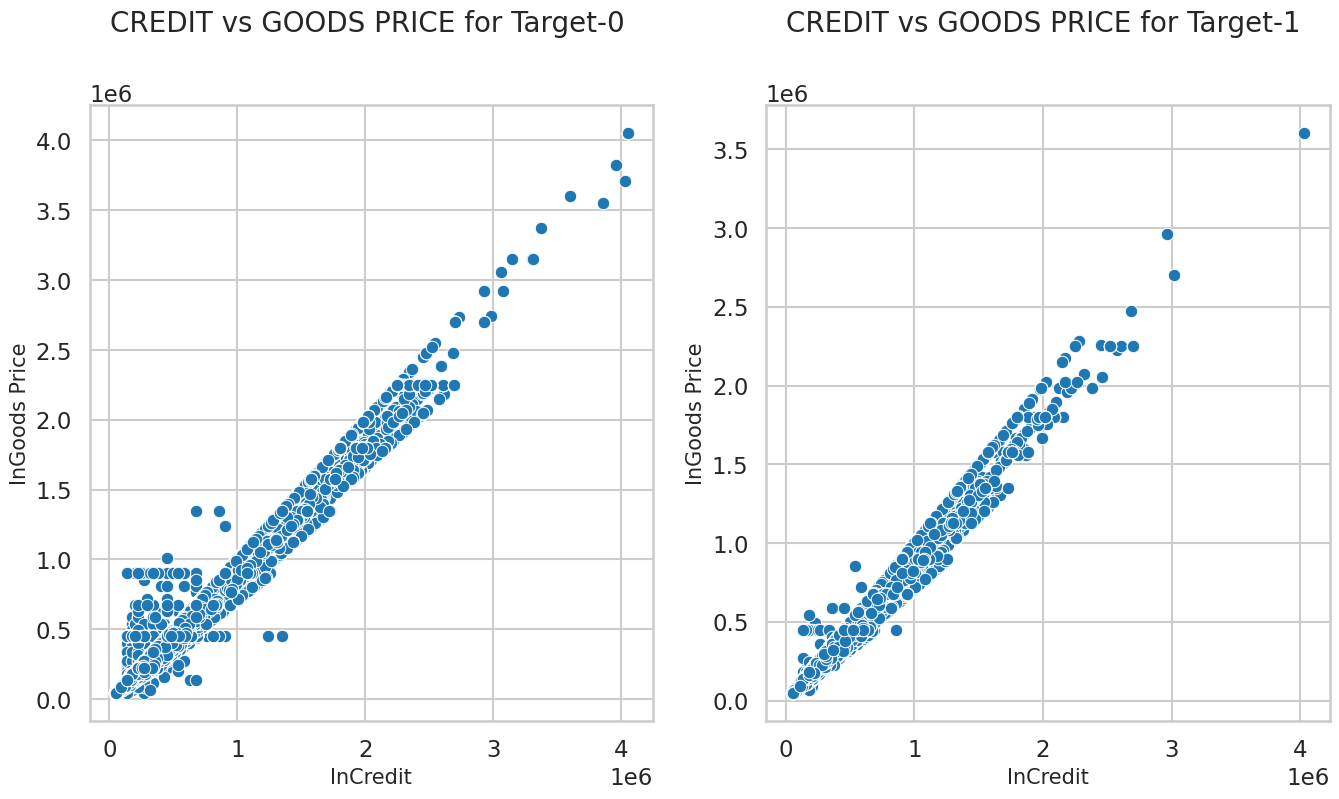

In [85]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x="AMT_CREDIT",y="AMT_GOODS_PRICE",data=target_0)
plt.title("CREDIT vs GOODS PRICE for Target-0 \n", fontsize=20)
plt.xlabel("InCredit", fontsize=15)
plt.ylabel("InGoods Price", fontsize=15)
plt.subplot(1,2,2)

sns.scatterplot(x="AMT_CREDIT",y="AMT_GOODS_PRICE",data=target_1)
plt.title("CREDIT vs GOODS PRICE for Target-1 \n", fontsize =20)
plt.xlabel("InCredit", fontsize=15)
plt.ylabel("InGoods Price", fontsize=15)
plt.show()

As per the analysis we can say that Goods Price and Credit are linearly distributed to each other or highly corelated to each other. So, if we increase goods, credit will also increase.

In [86]:
# Box Plotting for the Target - 0, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x="NAME_EDUCATION_TYPE",y="AMT_CREDIT", hue ="NAME_FAMILY_STATUS" ,orient="v" ,palette="Set1")

plt.xticks(rotation=20)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET-0) \n', fontsize=20)
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'saparated' of Academic degree education are having higher number of credits than other. Also higher education of family status of 'marriage', 'single', and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

In [87]:
# Box Plotting for the Target - 0, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x="NAME_EDUCATION_TYPE",y="AMT_INCOME_TOTAL", hue ="NAME_FAMILY_STATUS" ,orient="v" ,palette="Set1")

plt.xticks(rotation=20)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET-0) \n', fontsize=20)
plt.show()

From the above boxplot for Eduaction type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less amount than outliers.

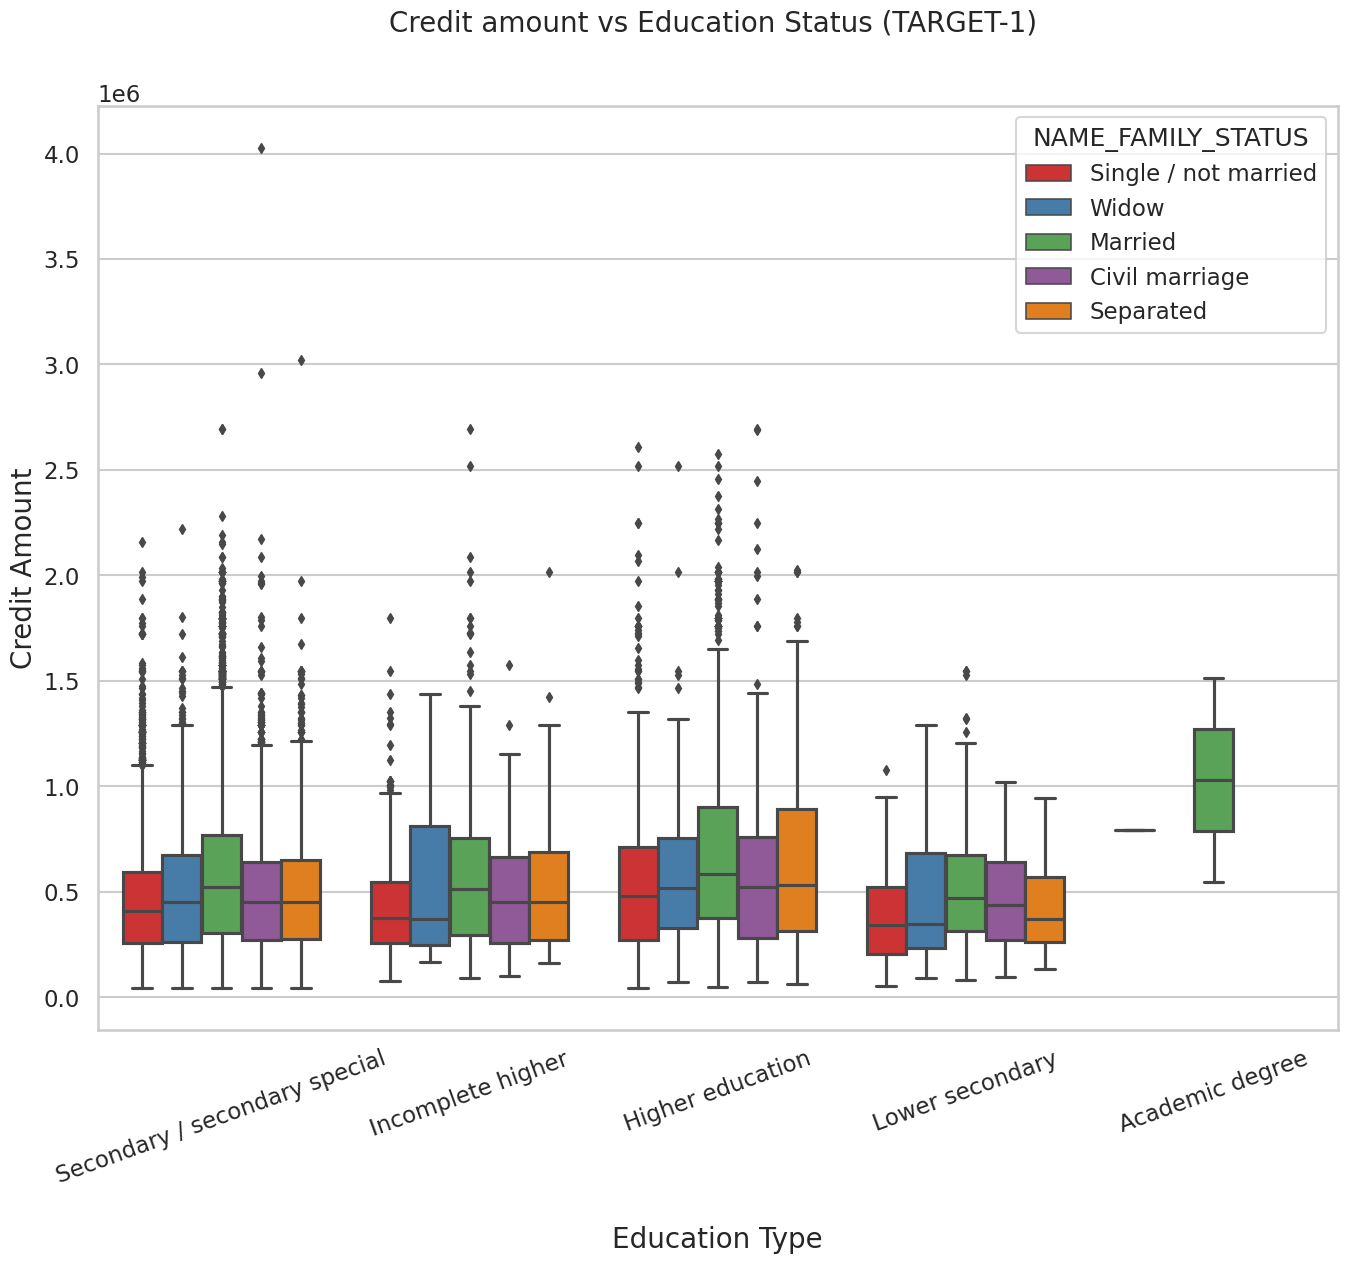

In [88]:
# Box Plotting for the Target - 1, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x="NAME_EDUCATION_TYPE",y="AMT_CREDIT", hue ="NAME_FAMILY_STATUS" ,orient="v" ,palette="Set1")

plt.xticks(rotation=20)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET-1) \n', fontsize=20)
plt.show()

From the above analysis we can say that Family status of 'civil marriage', 'marriage', and 'saparated' of Academic degree education are having higher number of credits than others. Most of the outliers are from education type 'Higher education' and 'Secondary'. Civil marriage Academic degree is having most of the credits in the third quartile.

In [89]:
#Box Plotting for the Target - 1, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x="NAME_EDUCATION_TYPE",y="AMT_INCOME_TOTAL", hue ="NAME_FAMILY_STATUS" ,orient="v" ,palette="Set1")

plt.xticks(rotation=20)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET-1) \n', fontsize=20)
plt.show()

From above boxplot for Eduaction type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. lower secondary are have less income amount than others.

In [90]:
plt.figure(figsize=(40,25))
coorelation=Merged_data.corr()
sns.heatmap(abs(coorelation), annot=True, cmap='coolwarm')

<Axes: >

From the Analysis we will consider some highly corelated features that may cause multicolinearity.

1. CNT_FAM_MEMBERS and CNT_CHILDREN (88%)
2. AMT_ANNUITY AND AMT_CREDIT (77%)
3. AMT_GOODS_PRICE and AMT_CREDIT (99%)
4. AMT_GOODS_PRICE and AMT_ANNUITY (77%)
5. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE (85%)
6. OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE (100%)
7. DAYS_EMPLOYED AND DAYS_BIRTH (61%)

dropping columns that are highly correlated to remlove multicollinearity.

In [94]:
Merged_data.drop(columns=['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_BIRTH'], inplace=True)

In [98]:
Merged_data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [116]:
Merged_data.shape

(331005, 31)

In [125]:
# Filtering out categorical data from the Merged Data
categorical_data=Merged_data.select_dtypes(include='object')
Numerical_data =Merged_data.describe().columns

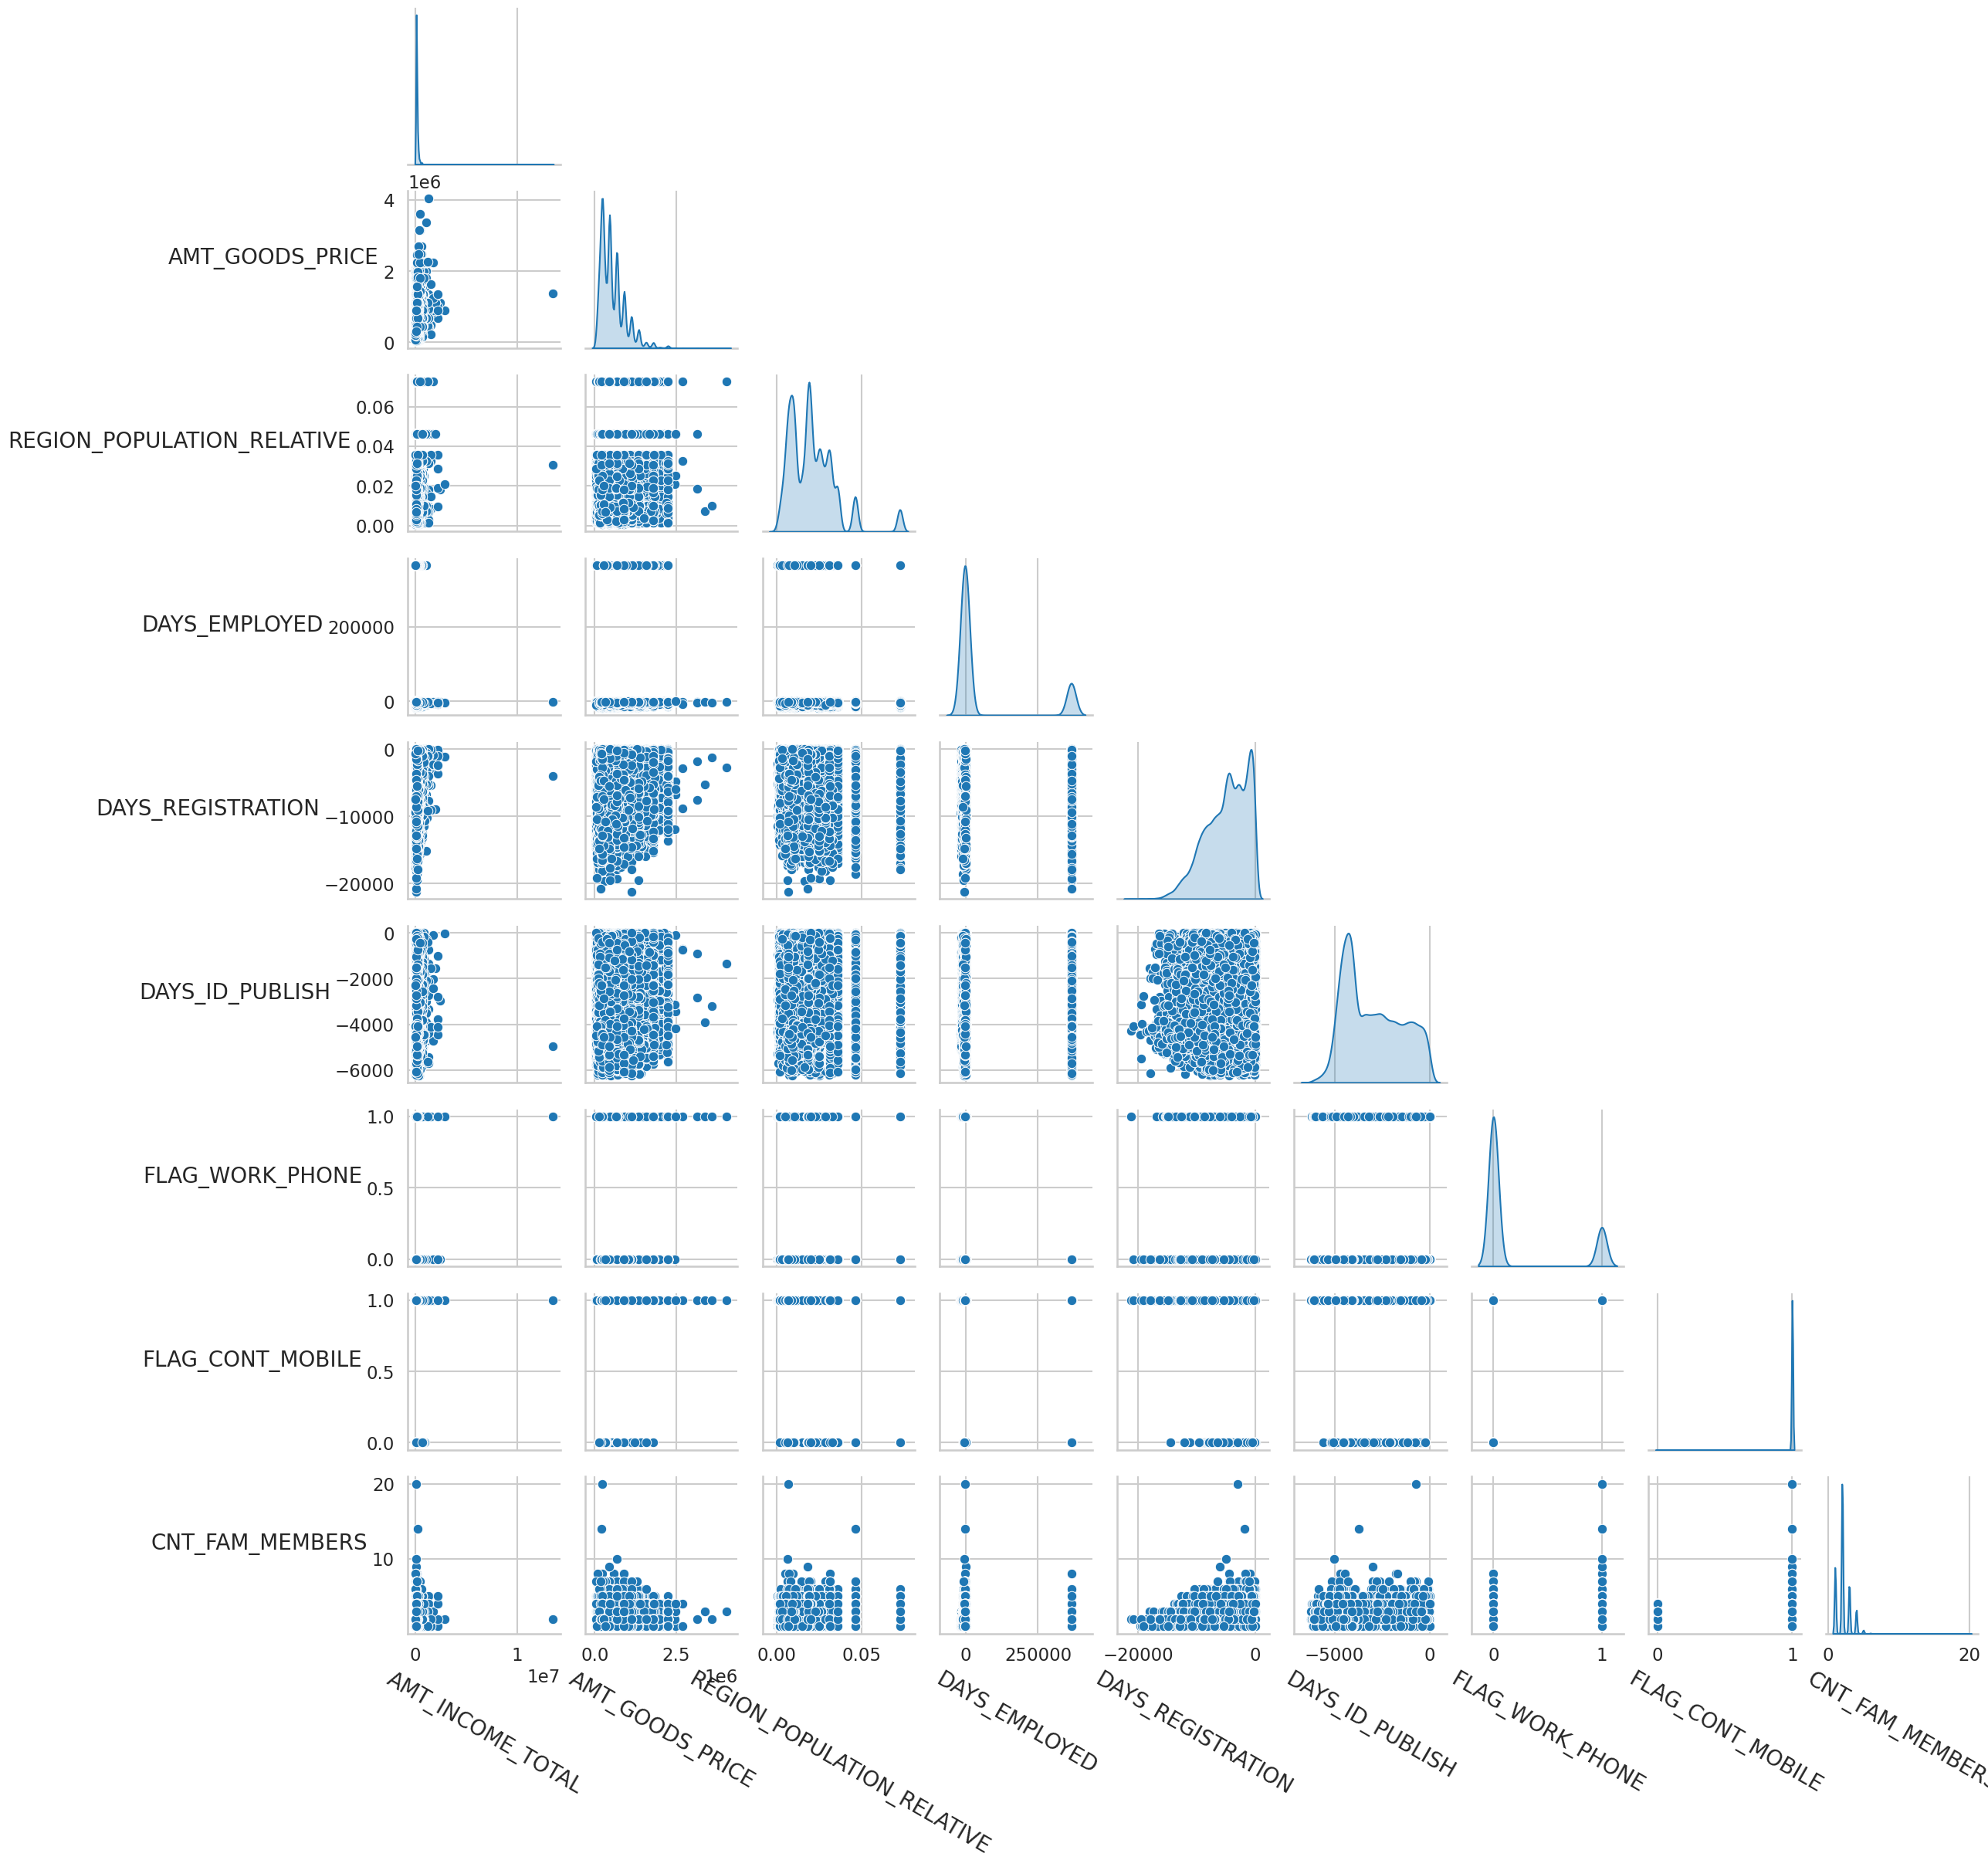

In [120]:
g = sns.pairplot(Merged_data[Numerical_data[1:10]].sample(50000), diag_kind='kde', corner=True)
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -30)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

### **Hot Encoding**

In [122]:
Merged_data.shape

(331005, 31)

In [121]:
categorical_data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [123]:
dataset_pr = pd.get_dummies(Merged_data, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'])


In [124]:
dataset_pr.shape

(331005, 119)

### Finding and removing Highly correlated data

In [127]:
# Correlation matrix
corrmatrix = dataset_pr.corr()

In [130]:
def correlation(df, threshold):
  correlated_cols = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        correlated_cols.add(colname)
  return correlated_cols

In [133]:
correlation(dataset_pr, 0.5)

{'CODE_GENDER_M',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_Y',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_With parents',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_Working',
 'NAME_TYPE_SUITE_Unaccompanied',
 'ORGANIZATION_TYPE_XNA'}

In [134]:
#Dropping columns which are more than 50% highly correlated
dataset_pr.drop(columns=['CODE_GENDER_M',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_Y',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_With parents',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_Working',
 'NAME_TYPE_SUITE_Unaccompanied',
 'ORGANIZATION_TYPE_XNA'], inplace=True)

In [135]:
dataset_pr.shape

(331005, 106)

In [136]:
# Final output
dataset_pr.head()

TARGET  AMT_INCOME_TOTAL  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0       1          202500.0         351000.0                    0.018801   
1       0          270000.0        1129500.0                    0.003541   
2       0           67500.0         135000.0                    0.010032   
3       0          135000.0         297000.0                    0.008019   
4       0          121500.0         513000.0                    0.028663   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_WORK_PHONE  \
0           -637              -3648            -2120                0   
1          -1188              -1186             -291                0   
2           -225              -4260            -2531                1   
3          -3039              -9833            -2437                0   
4          -3038              -4311            -3458                0   

   FLAG_CONT_MOBILE  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  \
0                 1                1                       10      0.262949   
1                 1                2                       11      0.622246   
2                 1                1                        9      0.555912   
3                 1                2                       17      0.650442   
4                 1                1                       11      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                         2                         2   
1      0.535276                         1                         0   
2      0.729567                         0                         0   
3      0.535276                         2                         0   
4      0.535276                         0                         0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                          0                           1   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   NAME_CONTRACT_TYPE_Cash loans  CODE_GENDER_F  FLAG_OWN_CAR_N  \
0                              1              0               1   
1                              1              1               1   
2                              0              0               0   
3                              1              1               1   
4                              1              0               1   

   FLAG_OWN_REALTY_N  NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  \
0                  0                         0                       0   
1                  1                         0                       1   
2                  0                         0                       0   
3                  0                         0                       0   
4                  0                         0                       0   

   NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                     

# **Conclusions**

##**Accept**


Banks should approve loans more for Office apartment, Co-Op apartment housing type as there are less payment difficulties.      

Banks should provide loans to Repairs`& `Others' purposes.    

Banks should provide loans to the 'Business Entity Type-3' and 'Selt-Employed' persons.       

Working people especially female employers are the best to target for the loans.

old Female clients and Clients with higher education can be responsible person.

Bank should target refreshed clients who has unused loan status previously.

Any client who's previous loan was approved and Widow who has unused previous loan status.

Clients with high income category specially who are working as a state servant.
          

## **Reject**

Lower secondary education clients are the most in number to be defaulted when their previous loans are cancelled or refused.

Male clients with civil marriage.

Previous refused loan status group, due to not paying in time.

Clients working as low-skilled labourers and having high child count(6-11).

Young clients with incomplete Higher Education. Students which are in collage and school that can be default payment because of no income source.

Clients with less income and more family mamber should be take a look becuase there family expneses are more as compare to less member family.





